## Based on this resource

https://realpython.com/k-means-clustering-python/

In [1]:
!pip list

Package                            Version
---------------------------------- -----------
affinegap                          1.12
alabaster                          0.7.12
anaconda-client                    1.10.0
anaconda-navigator                 2.2.0
anaconda-project                   0.11.1
anyio                              3.5.0
applaunchservices                  0.2.1
appnope                            0.1.2
appscript                          1.1.2
argh                               0.26.2
argon2-cffi                        21.3.0
argon2-cffi-bindings               21.2.0
asn1crypto                         1.5.1
astroid                            2.11.7
astropy                            5.1
asttokens                          2.0.5
atomicwrites                       1.4.0
attrs                              21.4.0
autocorrect                        2.6.1
autopep8                           1.5.6
Babel                              2.9.1
backcall                           0.2.0
bac

wheel                              0.37.1
widgetsnbextension                 3.5.2
wrapt                              1.14.1
wurlitzer                          3.0.2
xlrd                               2.0.1
XlsxWriter                         3.0.3
xlwings                            0.24.9
xlwt                               1.3.0
yapf                               0.31.0
zict                               2.1.0
zipp                               3.8.0
zope.event                         4.5.0
zope.index                         5.1.0
zope.interface                     5.4.0


In [2]:
# Let's start by insallting then importing some packages...

# !pip install matplotlib
# !pip install kneed
# !pip install sklearn

import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [3]:
from platform import python_version 
print('python:            ',python_version())

python:             3.8.13


## Step 1 - Let's generate some clusters

First, we will use the scikit-learn function 'make_blobs', which is used to generate synthetic clusters. It uses the following parameters:

* n_samples - total number of samples to generate
* centres - the number of centroids to generate
* random_state - if we set this to 'None' a random number will be generated each time we call on the function. But, if we set it to an integer e.g. 32, this allows for reproducible output each time we call on the function.
* cluster_std - the standard deviation... but we won't worry about this too much for now

In [4]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=32
)

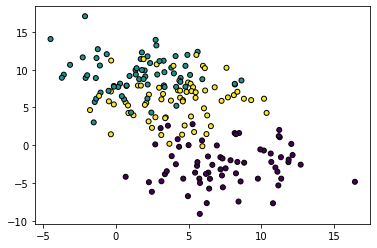

In [5]:
plt.scatter(features[:,0], features[:,1], marker = "o", c = true_labels, s = 25, edgecolor = "k")

In [6]:
len(features)

200

Let's take a closer look at the first 5 samples, starting with the features.

In [7]:
features[:5]

array([[ 5.98141618, 10.51611954],
       [ 4.44331872,  8.91046702],
       [ 4.15174699,  5.22640696],
       [ 2.24146988,  3.16161526],
       [ 7.18004878, -1.57894707]])

In [8]:
true_labels[:5]

array([2, 1, 1, 2, 0])

As we can see, we have an array containing 2 numerical values for each sample. 

When it comes to performing clustering on a given dataset, you must think carefully about your feature variables. 

Perhaps your dataset contains information on bank loans and custoner data. It could contain a variable 'annual income' which ranges from £19,000 - £1,000,000, and another variable 'monthly debt' which ranges from £0 - £400,000. Therefore, we must change the values of these numeric columns in the dataset to ensure that they use a common scale, i.e., we standardise/normalise the data. In machine learning, this is referred to as 'feature scaling', and is especially important for clustering given that it is a distance-based algorithm.

Because k-means uses the Euclidean distance to calculate the distance between data points and the centroids, we need to ensure that the distance measure accords equal weight to each variable. We don't want to put more weight on variables that might have higher variance. 



## Step 2 - Standardise the data

To do this, we will use scikit-learn's preprocessing package which comes with a StandardScaler() class, which is a quick way to perform feature scaling.

In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [10]:
scaled_features[:5]

array([[ 0.41715892,  1.11834775],
       [ 0.01079153,  0.83303204],
       [-0.0662421 ,  0.17839464],
       [-0.57093984, -0.1885076 ],
       [ 0.73383924, -1.0308797 ]])

Let's look at the variance for each matrix column BEFORE and AFTER feature scaling...

In [11]:
# Variance for the first column before scaling...

features[:,0].var()

14.326167418288941

In [12]:
# Variance for the second column before scaling...

features[:,1].var()

31.67027058298565

In [13]:
# Variance for first column after scaling...

scaled_features[:,0].var()

0.9999999999999993

In [14]:
# Variance for second column after scaling...

scaled_features[:,1].var()

1.0000000000000009

## Step 3 - Clustering

Nice. We can see that the variance of the two columns are now both close to 1.0. Now that we have finished the preprocessing phase, we can start to cluster our data!

To do this we can use the KMeans class which comes with the scikit-learn package. It has the following parameters:

* init - this is the method for initialisation. The standard version of the k-means algorithm is implemented by setting init to "random".

* n_clusters - this is the number of clusters that you want the algorithm to form, as well as the number of centroids to generate

* n_iter - this refers to the number of iterations, i.e., the number of times that the k-means algorithm will be run. This is important because 2 runs can converge on different cluster assignments. The default behaviour for the scikit-learn algorithm is to perform ten k-means runs and then return the results of the one with the lowest sum of the squared error (SSE).

* max_iter - this refers to the max number of iterations of the algorithm for a single run. 

In [15]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init = 10,
    max_iter=300,
    random_state=32
)

In [16]:
# This will perform 10 runs of the k-means algorithm on the data, with a maximum of 300 iterations per run


kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=32)

After fitting the data to the algorithm, we can then access statistics from the initilisation run. These statistics are from the run with the lowest SSE.

In [17]:
# The lowest SSE value

kmeans.inertia_

124.31264130265883

In [18]:
# Final locations of the centroid
# These are the coordinates of the cluster centers

kmeans.cluster_centers_

array([[ 0.17788628,  0.42416043],
       [ 0.86785736, -1.2135988 ],
       [-1.07004213,  0.78200693]])

In [19]:
# The number of iterations required for the algorithm to converge

kmeans.n_iter_

12

In [20]:
# Another attribute, labels_, shows us which cluster each datapoint in our scaled_features was assigned to
# These are stored as a one-dimensional NumPy array

kmeans.labels_

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0,
       1, 0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 1,
       2, 1, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 1,
       1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2,
       2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 1,
       1, 1, 0, 0, 2, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 2, 2, 2,
       1, 0], dtype=int32)

In [21]:
true_labels[:5]

array([2, 1, 1, 2, 0])

In [22]:
# The first 5 predicted labels

kmeans.labels_[:5]

array([0, 0, 0, 0, 1], dtype=int32)

## How do we decide on the number of clusters?

You'll notice that each time you increment the number of clusters, the inertia value (the lowest SSE value found during the k-means runs) decreases. As more centroids are added, the distance from each point to its closest centroid will decrease. So, how do we know when to stop adding centroids?

A common method used to evaluate the appropriate number of clusters is the 'elbow method'. Determining the number of clusters is a crucial step in the k-means algorithm, and it involves running k-means clustering on the dataset for a range of values for k (e.g. 1-10). Then, we compute the SSE values for each k. The elbow method reveals a 'sweet spot' where the SSE curve starts to bend, i.e, its elbow point.

### The Elbow Method

In [23]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 32}



# Here we create a variable 'sse' which contains an empty list

sse = []

# We then iterate through each k value, ranging from 1-10
# Note: range() method does not include the end number in the result, that's why we do 1-11
for k in range(2, 11):
#     For each k, we instantiate the kmeans class 
# Here, the double asterix operator **  is used to unpack a dictionary of keyword arguments, kwargs
# We use it to unpack kmeans_kwargs, which have passed to the KMeans function
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    print(kmeans)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    
# Let's take a look at our SSE scores
print("")
print(sse)


KMeans(init='random', n_clusters=2, random_state=32)
KMeans(init='random', n_clusters=3, random_state=32)
KMeans(init='random', n_clusters=4, random_state=32)
KMeans(init='random', n_clusters=5, random_state=32)
KMeans(init='random', n_clusters=6, random_state=32)
KMeans(init='random', n_clusters=7, random_state=32)
KMeans(init='random', random_state=32)
KMeans(init='random', n_clusters=9, random_state=32)
KMeans(init='random', n_clusters=10, random_state=32)

[174.4367506470675, 124.31264130265883, 91.01408809786318, 76.32266299257651, 62.67242810297484, 52.67066764415399, 45.106560929767454, 38.99694723134398, 35.14403084800228]


We want to pick the value of k at the "elbow" i.e., the point after which the inertia starts decreasing in a linear fashion. In order to observe the elbow, we can plot the number of clusters and the corresponding sse values. In the graph below, it's rather subtle, but we can see that the elbow point is at k=4. In which case, we can determine that the appropriate number of clusters for this dataset, is 4.

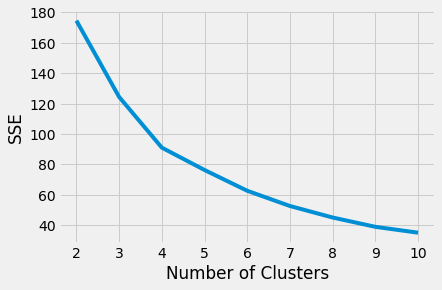

In [24]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

However, if the graph isn't all that clear, and you'd like a more straightforward means of acquiring the elbow point, you can use the 'kneed' Python package. This comes with the KneeLocator() class, which determines the elbow point programmatically. Let's see if it matches our observation that k should = 4.

In [25]:

kl = KneeLocator(
    range(2, 11), sse, curve="convex", direction="decreasing")


# We can now access the 'elbow' variable
kl.elbow

4

In [26]:
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(scaled_features)

kmeans.labels_

array([2, 2, 2, 1, 0, 0, 2, 3, 0, 2, 1, 3, 2, 1, 1, 0, 1, 2, 0, 3, 0, 2,
       0, 2, 1, 2, 3, 0, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 3, 2, 2, 0, 2, 3,
       0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 3, 0, 0, 2, 0, 2, 3, 2, 0, 3,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 3, 0, 2, 1, 1, 1, 2, 3, 2, 0,
       1, 0, 1, 1, 2, 1, 2, 3, 1, 0, 3, 1, 0, 1, 1, 2, 3, 1, 2, 2, 0, 3,
       0, 1, 2, 3, 3, 3, 0, 0, 2, 1, 1, 0, 3, 2, 1, 2, 1, 2, 0, 0, 3, 2,
       1, 1, 1, 3, 2, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 0, 0,
       2, 2, 2, 0, 1, 0, 0, 3, 1, 0, 3, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2, 3,
       0, 0, 2, 2, 1, 0, 0, 1, 3, 2, 1, 1, 1, 2, 3, 3, 1, 2, 2, 1, 1, 1,
       3, 2], dtype=int32)

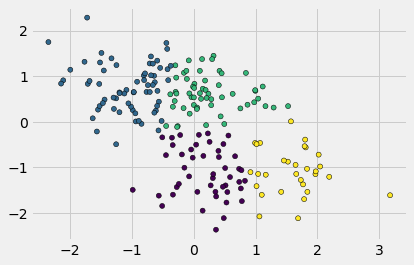

In [27]:
plt.scatter(scaled_features[:,0], scaled_features[:,1], marker = "o", c = kmeans.labels_, s = 25, edgecolor = "k")

In [28]:
# To do: plot cluster centroids

## K-Means Clustering on Customer Dataset

Now that we've covered the basics of the k-means algorithm using our rather lifeless blobs of points, let's explore some real-world data!

The dataset that we are going to use contains information on customers of a wholesale distributor. It includes the annual spendingon a range of product categories. Let's see if we can use k-means clustering to segment/group these customers based on their spending habits.

In [28]:
# Import necessary libraries

# We will need pandas to import and manipulate our csv file, i.e., our dataset
import pandas as pd
# !pip install pandas_profiling
import pandas_profiling

In [29]:
# Read in the dataset
df = pd.read_csv("data/customer_data.csv")

In [30]:
# head() function shows the first 5 rows in a dataset
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Pre-processing

Let's have a closer look at our variables to see if we need to perform any pre-processing.
It's clear that the variables 'Channel' and 'Region' have been label encoded (each value has been converted into a number), therefore the variance for these variables will be extremely low compared to the product variables. 


In [31]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Remember, because k-means uses the Euclidean distance to calculate the distance between data points and the centroids, we need to ensure that the distance measure accords equal weight to each variable. We don't want to put more weight on variables that might have higher variance - i.e., the product variables. Therefore, we will need to standardise this dataset.

In [32]:
# Initialise scaler object using StandardScaler() class

scaler = StandardScaler()

# Use fit_transform method of scaler object and apply it to the dataframe

scaled_df = scaler.fit_transform(df)

In [33]:
df.Channel.var()

0.2190722716918627

In [34]:
# Channel variance is now 1.0 -> scaled to unit variance

scaled_df[:,0].var()

1.0

In [35]:
df.Fresh.var()

159954927.4214072

In [36]:
# Fresh variance is now around 1.0 

scaled_df[:,2].var()

1.0000000000000002

In [37]:
pd.DataFrame(scaled_df).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [39]:
# When we used make_blobs() we are able to access ground truth labels. But in practice, it's rare to encounter datasets that have ground truth labels. This dataset certainly doesn't.

## Initialising your k-means model

In [38]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init = 10,
    max_iter=300,
    random_state=0
)

In [39]:
kmeans.fit(scaled_df)

KMeans(init='random', n_clusters=3, random_state=0)

In [40]:
kmeans.inertia_

2149.2839562217573

## Evaluation: the elbow method

As we can see the lowest SSE produced from the algorithm runs, is quite high. This suggests that our current kmeans model is not a good fit for the data. We want to reduce this inertia value considerably. The inertia value is sensitive to the number of clusters that we use when running the algorithm. Therefore, to help find the optimum number of clusters, let's use the aforementioned elbow method. 

In [41]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 0}



# Here we create a variable 'sse' which contains an empty list

sse = []

# We then iterate through each k value, ranging from 1-10
# Note: range() method does not include the end number in the result, that's why we do 1-11
for k in range(2, 15):
#     For each k, we instantiate the kmeans class 
# Here, the double asterix operator **  is used to unpack a dictionary of keyword arguments, kwargs
# We use it to unpack kmeans_kwargs, which have passed to the KMeans function
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    print(kmeans)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)
    
# Let's take a look at our SSE scores
print("")
print(sse)


KMeans(init='random', n_clusters=2, random_state=0)
KMeans(init='random', n_clusters=3, random_state=0)
KMeans(init='random', n_clusters=4, random_state=0)
KMeans(init='random', n_clusters=5, random_state=0)
KMeans(init='random', n_clusters=6, random_state=0)
KMeans(init='random', n_clusters=7, random_state=0)
KMeans(init='random', random_state=0)
KMeans(init='random', n_clusters=9, random_state=0)
KMeans(init='random', n_clusters=10, random_state=0)
KMeans(init='random', n_clusters=11, random_state=0)
KMeans(init='random', n_clusters=12, random_state=0)
KMeans(init='random', n_clusters=13, random_state=0)
KMeans(init='random', n_clusters=14, random_state=0)

[2599.3855593561393, 2149.2839562217573, 1851.8408722743866, 1610.1065091401204, 1326.5643001924354, 1218.4764646621904, 1141.8948076298393, 1081.9559260341364, 1025.8094266490193, 965.6708968969313, 832.4788262187947, 783.0080417220904, 735.4303202088995]


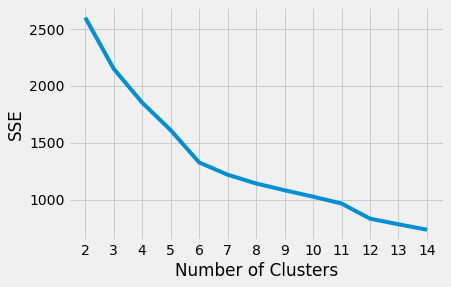

In [42]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), sse)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [43]:

kl = KneeLocator(
    range(2, 15), sse, curve="convex", direction="decreasing")


# We can now access the 'elbow' variable
kl.elbow

6

## Let's build the model with the optimal clusters, k=6

In [44]:
kmeans = KMeans(
    init="random",
    n_clusters=6,
    n_init = 10,
    max_iter=300,
    random_state=0
)

In [45]:
kmeans.fit(scaled_df)

KMeans(init='random', n_clusters=6, random_state=0)

In [46]:
kmeans.inertia_

1326.5643001924354

In [47]:
kmeans.labels_

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       4, 5, 2, 2, 1, 1, 2, 4, 1, 1, 1, 4, 1, 2, 4, 2, 2, 4, 4, 1, 2, 2,
       2, 2, 2, 5, 2, 2, 1, 1, 4, 2, 1, 1, 5, 2, 1, 1, 2, 5, 2, 2, 1, 5,
       1, 2, 1, 1, 1, 4, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 5, 5, 4,
       1, 4, 1, 1, 5, 4, 2, 1, 2, 1, 1, 1, 2, 2, 2, 4, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4, 1, 2, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       4, 1, 1, 1, 1, 4, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 4, 2,
       3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 5, 3, 3, 2, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 3, 3, 3, 4, 1, 1, 4, 1, 1, 2, 1, 2, 4, 4, 4, 4,
       1, 1, 1, 4, 1, 1, 1, 2, 3, 2, 3, 2, 2, 3, 2,

In [48]:
kmeans.cluster_centers_

array([[-6.90297086e-01, -5.58343155e-02,  1.80335587e+00,
         3.33298726e+00,  9.42518505e-01,  9.40980070e+00,
        -4.46409015e-01,  8.96415723e+00],
       [-6.90297086e-01,  5.90668285e-01, -2.52033049e-01,
        -3.85809244e-01, -4.76606883e-01, -8.06492077e-02,
        -4.42468053e-01, -1.83933396e-01],
       [ 1.44865163e+00,  1.63142372e-01, -3.47307951e-01,
         4.28317250e-01,  6.66702394e-01, -3.55967591e-01,
         6.92257331e-01,  5.10760509e-03],
       [-5.65939603e-01, -1.58939862e+00, -1.29162616e-01,
        -3.53211563e-01, -4.09523871e-01,  3.37648564e-02,
        -4.22842794e-01, -1.48108824e-01],
       [-5.88442385e-01,  3.13595742e-01,  2.15231486e+00,
        -1.25191341e-01, -2.42118698e-01,  8.60394956e-01,
        -4.19951952e-01,  3.81096492e-01],
       [ 1.44865163e+00,  2.93864819e-03,  3.88728973e-01,
         3.94304862e+00,  4.02164626e+00,  3.57841274e-02,
         4.22611641e+00,  9.41635735e-01]])

In [49]:
clusters = range(2,15)

In [50]:
import numpy as np

sse_df = pd.DataFrame(np.column_stack((clusters, sse)), columns=['cluster', 'SSE'])

In [51]:
sse_df

,cluster,SSE
0,2.0,2599.385559
1,3.0,2149.283956
2,4.0,1851.840872
3,5.0,1610.106509
4,6.0,1326.564300
5,7.0,1218.476465
6,8.0,1141.894808
7,9.0,1081.955926
8,10.0,1025.809427
9,11.0,965.670897


In [52]:
len(df)

440

In [ ]:
pred = kmeans.predict(scaled_df)
# df['cluster'] = pred
# print('\nCount in each cluster: \n', data['cluster'].value_counts())